# Searching for and reading CMIP6 data

In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
# open cmip online catalog
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
# Load sea ice concentration from NorESM2-LM, historical experiment
cat = col.search(source_id=['NorESM2-LM'], activity_id = ['CMIP'], experiment_id=['historical'], table_id=['SImon'], variable_id=['siconc'], member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historica...,NaN,20190815


In [4]:
# Create dictionary from the list of datasets we found
ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
list(ds_dict.keys())

['CMIP.NCC.NorESM2-LM.historical.SImon.gn']

In [6]:
ds = ds_dict[list(ds_dict.keys())[0]]

In [7]:
ds.siconc

<xarray.DataArray 'siconc' (member_id: 1, time: 1980, j: 384, i: 360)>
dask.array<broadcast_to, shape=(1, 1980, 384, 360), dtype=float32, chunksize=(1, 509, 384, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
    latitude   (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    longitude  (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type       |S7 ...
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_measures:   area: areacello
    cell_methods:    area: mean where sea time: mean
    comment:         Percentage of grid cell covered by sea ice
    history:         2019-08-15T18:06:09Z altered by CMOR: Converted units fr...
    long_name:       Sea-Ice Area Percentage (Ocean Grid)
    original_name:   aice
    original_units:  1
    standard_name:   sea_ice_area_fraction
    units:           %

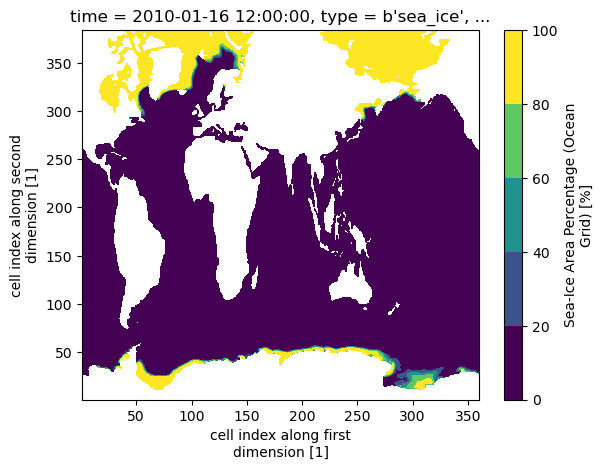

In [8]:
ds.siconc.isel(member_id=0).sel(time='2010-01-16').squeeze().plot.contourf()

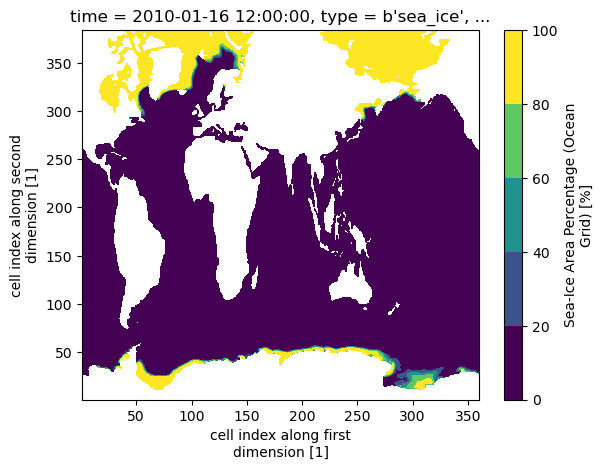

In [9]:
ds.siconc.sel(time='2010-01-16').squeeze().plot.contourf()